In this Notebook we show cases where the Standard method fails to estimate the tails of two polynomial distributions, whereas our method suceeds. In this case the sampling from different individual conditional distribution is uniform. 50 percent of the samples come from the fatter tail and the other 50 percent comes from the thinner tail.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
def pickands_estimator(x,thresh,avg_size):
    y=x.copy()
    length=x.shape[0]
    cutoff=int(thresh*length)
    x=-np.sort(-np.sort(x, axis=0)[cutoff:], axis=0)
    ksi=np.array([])
    for j in np.arange(np.sqrt(length-cutoff))[-avg_size:]:
        k=int(j+1)
        ksi=np.append(ksi,np.log((x[k]-x[2*k])/(x[2*k]-x[4*k]))/np.log(2))
       
    ksi=ksi.reshape(avg_size,-1)
    ksi=ksi.mean(0)
    return ksi

In [3]:
#Define two distributions, with tail shape parameters 1 and 0.5.  We sample 1000 points from each of these 
#two distributions, put them together in an array which represents the samples from the uniform mixture of 
#these two distribution, Apply Pickands estimator, to this array in order to estimate the tail shape parameter.
#Repeat this process 1000 times to model the distribution of the predictions of the shape parameter of the marginal
hist_few_samples=[]
for i in range(1000):
    x1=np.random.rand(1000)
    y1=x1**(-1)
    x2=np.random.rand(1000)
    y2=x2**(-0.5)
    z=np.hstack((y1,y2+1000))
    hist_few_samples.append(pickands_estimator(z,0.95,5)[0])
hist_few_samples=np.array(hist_few_samples)

In [4]:
np.array(hist_few_samples).mean()

0.4791998108792131

In [5]:
#Define two distributions, with tail shape parameters 1 and 0.5.  We sample 20000 points from each of these 
#two distributions, put them together in an array which represents the samples from the uniform mixture of 
#these two distribution, Apply Pickands estimator, to this array in order to estimate the tail shape parameter.
#Repeat this process 1000 times to model the distribution of the predictions of the shape parameter of the marginal
hist_many_samples=[]
for i in range(1000):
    if i%100==0:
        print(i)
    x1=np.random.rand(20000)
    y1=x1**(-1)
    x2=np.random.rand(20000)
    y2=x2**(-0.5)
    z=np.hstack((y1,y2+1000))
    hist_many_samples.append(pickands_estimator(z,0.95,5)[0])
hist_many_samples=np.array(hist_many_samples)

0
100
200
300
400
500
600
700
800
900


In [6]:
np.array(hist_many_samples).mean()

0.9815685192116346

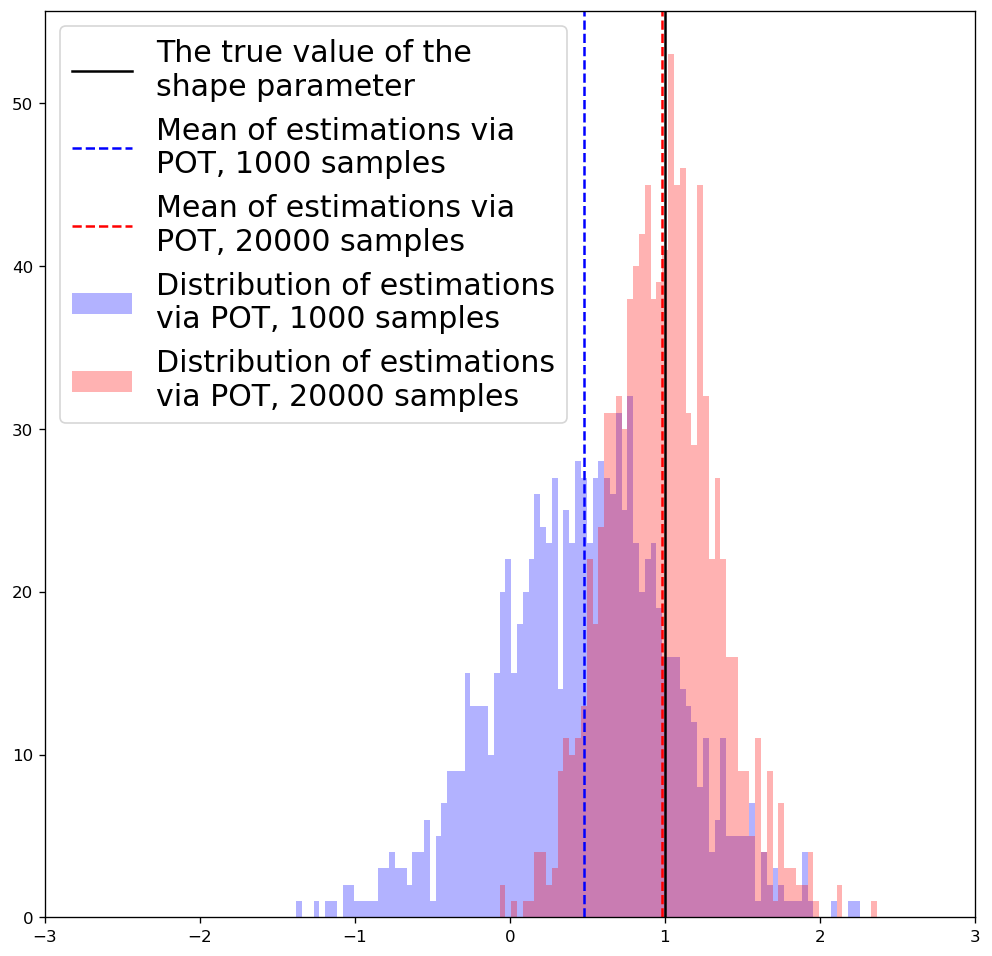

In [7]:
#Visualize results
figure(figsize=(10, 10), dpi=120)
bins=np.histogram(np.hstack((hist_few_samples,hist_many_samples)), bins=100)[1]
plt.hist(hist_few_samples, bins=bins, alpha=0.3, color='blue',label='Distribution of estimations\nvia POT, 1000 samples')
plt.hist(hist_many_samples, bins=bins, alpha=0.3, color='red', label='Distribution of estimations\nvia POT, 20000 samples')
plt.xlim([-3,3])
plt.axvline(1, color='black', alpha=1,label='The true value of the\nshape parameter')
plt.axvline(hist_few_samples.mean(), color='blue', alpha=1,linestyle='--',label='Mean of estimations via\nPOT, 1000 samples')
plt.axvline(hist_many_samples.mean(), color='red', alpha=1,linestyle='--',label='Mean of estimations via\nPOT, 20000 samples')
plt.legend( loc = 'upper left', prop={"size":18})
#plt.savefig('necessity_of_our_theorem_eg2_standard_approach_uniform.jpg')

In [8]:
#Define two distributions, with tail shape parameters 1 and 0.5.  We sample 1000 points from each of these 
#two distributions, and estimate the shape parameter of the tails of each separately. We choose the maximum of
#the estimated values. 
hist_few_samples=[]
for i in range(1000):
    x1=np.random.rand(1000)
    y1=x1**(-1)
    x2=np.random.rand(1000)
    y2=x2**(-0.5)
    xi1=pickands_estimator(y1,0.95,5)[0]
    xi2=pickands_estimator(y2,0.95,5)[0]
    hist_few_samples.append(max(xi1,xi2))
hist_few_samples=np.array(hist_few_samples)

In [9]:
np.array(hist_few_samples).mean()

0.9838009952051506

In [10]:
#Define two distributions, with tail shape parameters 1 and 0.5.  We sample 20000 points from each of these 
#two distributions, and estimate the shape parameter of the tails of each separately. We choose the maximum of
#the estimated values. 
hist_many_samples=[]
for i in range(1000):
    x1=np.random.rand(20000)
    y1=x1**(-1)
    x2=np.random.rand(20000)
    y2=x2**(-0.5)
    xi1=pickands_estimator(y1,0.95,5)[0]
    xi2=pickands_estimator(y2,0.95,5)[0]
    hist_many_samples.append(max(xi1,xi2))
hist_many_samples=np.array(hist_many_samples)

In [11]:
np.array(hist_many_samples).mean()

1.0227985168558287

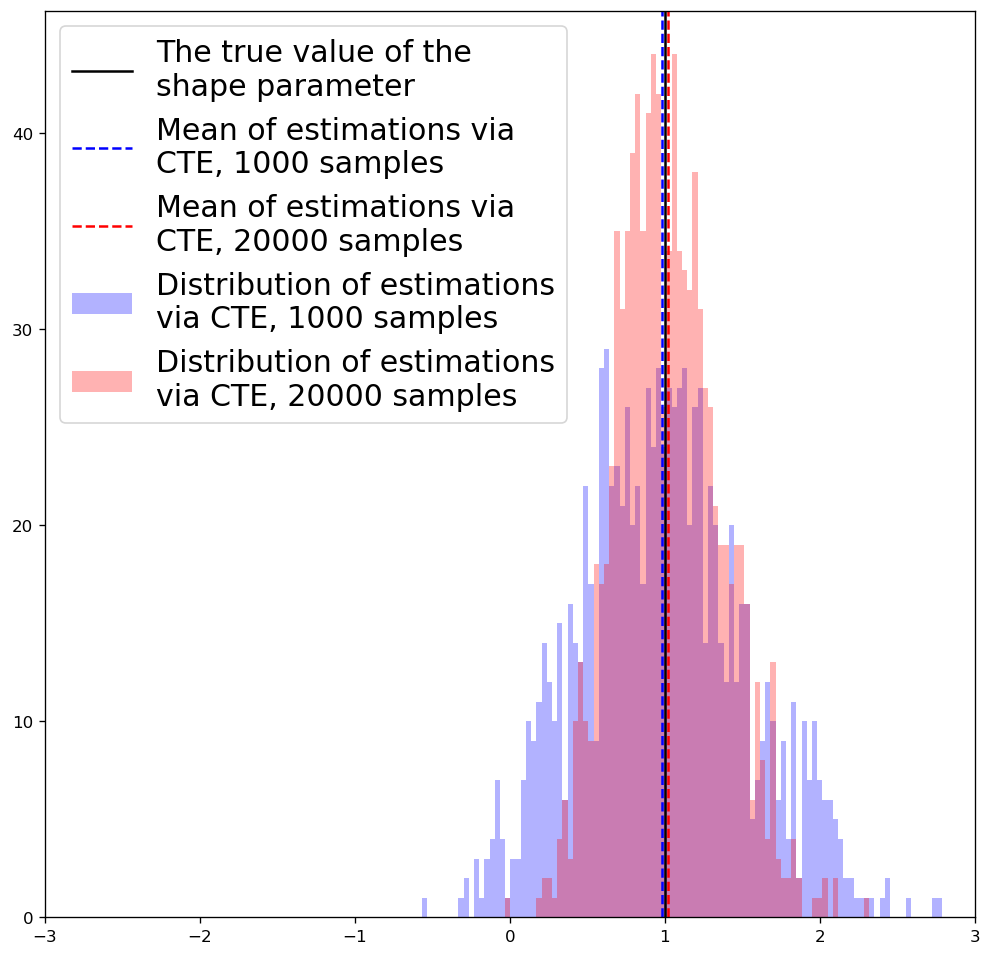

In [12]:
#Visualize results
figure(figsize=(10, 10), dpi=120)
bins=np.histogram(np.hstack((hist_few_samples,hist_many_samples)), bins=100)[1]
plt.hist(hist_few_samples, bins=bins, alpha=0.3, color='blue',label='Distribution of estimations\nvia CTE, 1000 samples')
plt.hist(hist_many_samples, bins=bins, alpha=0.3, color='red', label='Distribution of estimations\nvia CTE, 20000 samples')
plt.xlim([-3,3])
plt.axvline(1, color='black', alpha=1,label='The true value of the\nshape parameter')
plt.axvline(hist_few_samples.mean(), color='blue', alpha=1,linestyle='--',label='Mean of estimations via\nCTE, 1000 samples')
plt.axvline(hist_many_samples.mean(), color='red', alpha=1,linestyle='--',label='Mean of estimations via\nCTE, 20000 samples')
plt.legend( loc = 'upper left', prop={"size":18})
#plt.savefig('necessity_of_our_theorem_eg2_our_approach_uniform.jpg')